In [1]:
# Import the libraries
import numpy as np
import time
import tensorflow as tf

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:

BigX = np.load('.././soyabean_fianl_npz.npz') ##order W(52*6) S(100) P(16) S_extra(4)

X=BigX['data']


X_tr=X[X[:,1]<=2017]

X_tr=X_tr[:,3:]



# mean with axis=0 means respect to columns
M=np.mean(X_tr,axis=0,keepdims=True)
S=np.std(X_tr,axis=0,keepdims=True)
# normalization step, z score calculation for all the variable
X[:,3:]=(X[:,3:]-M)/S



index_low_yield=X[:,2]<10
print('low yield observations',np.sum(index_low_yield))
print(X[index_low_yield][:,1])
X=np.nan_to_num(X)
X=X[np.logical_not(index_low_yield)]


del BigX

Index=X[:,1]==2018  #validation year


print("train data",np.sum(np.logical_not(Index)))
print("test data",np.sum(Index))


# Validation year crop yeild mean and std.
print('Std %.2f and mean %.2f  of test ' %(np.std(X[Index][:,2]),np.mean(X[Index][:,2])))



low yield observations 79
[1980. 1984. 1980. 1983. 1984. 2000. 1980. 1984. 1983. 1980. 2000. 1984.
 1980. 1984. 1980. 1980. 2000. 1980. 1983. 1983. 1980. 1984. 1983. 2000.
 1983. 1988. 1980. 1980. 1983. 1984. 1985. 1980. 1980. 1984. 1980. 1984.
 1980. 1984. 1980. 1980. 1980. 1988. 1989. 1993. 1984. 1988. 1988. 1989.
 1993. 1988. 1992. 1988. 1988. 1989. 1988. 1989. 1985. 1988. 1989. 1992.
 1988. 1988. 1989. 1990. 1988. 1988. 1990. 1988. 1990. 1988. 1989. 1993.
 2004. 2002. 2003. 2004. 2002. 2003. 2003.]
train data 24794
test data 472
Std 10.55 and mean 53.94  of test 


/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


In [3]:
# X contain all the details with yeild.
X.shape

(25266, 395)

In [4]:
# 'promt' - write code for polynomical regression with train test split. we have 395 columns in the np array. calculate the RMSE for test data
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
# Make the split in X and y
All_training=X[X[:,1]<=2017]
X_tr=All_training[:,3:]
Y_tr=All_training[:, 2]

All_testing=X[X[:, 1]==2018]
X_test=All_testing[:, 3:]
Y_test=All_testing[:, 2]


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X is your features array with shape (n_samples, 395) and y is your target variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate polynomial features
# Choose the degree of the polynomial. Here, we use 2 for demonstration.
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_tr)
# X_test_poly = poly.transform(X_test)
# print("polynomial transformation is done.")

# Perform linear regression on the transformed features
model = LinearRegression()
model.fit(X_tr, Y_tr)
print("Linear regression model fitting is done.")

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the RMSE for the test data
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'The RMSE for the test data is: {rmse}')


Linear regression model fitting is done.
The RMSE for the test data is: 16.704148893447105


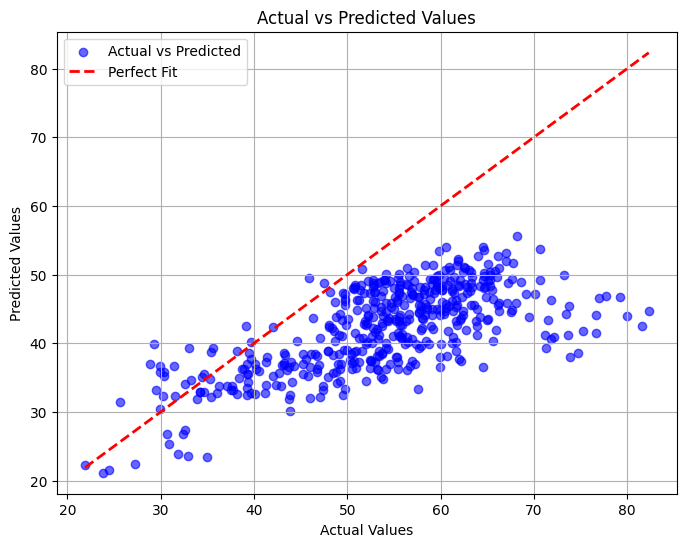

In [10]:
import matplotlib.pyplot as plt

# Assuming you have actual test labels (Y_test) and predicted values (y_pred)
plt.figure(figsize=(8, 6))
# plt.scatter(Y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
# plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.scatter(X_test, Y_test, color='red', label='Original (Test)')
plt.plot(X_test, y_pred, color='green', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

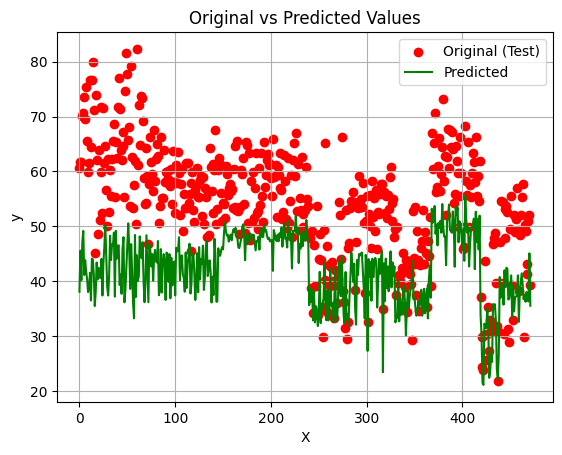

In [16]:
# plt.scatter(X_tr, Y_tr, color='blue', label='Original (Training)')
plt.scatter(range(0, Y_test.shape[0]), Y_test, color='red', label='Original (Test)')
plt.plot(range(0, Y_test.shape[0]), y_pred, color='green', label='Predicted')
plt.title('Original vs Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your features and target variable ready
# features = ... (your features)
# target = ... (your target variable)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_tr, Y_tr)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"Random forest : Root Mean Squared Error: {rmse}")

# You can also calculate other metrics or perform further analysis as needed


Random forest : Root Mean Squared Error: 13.971867770024552


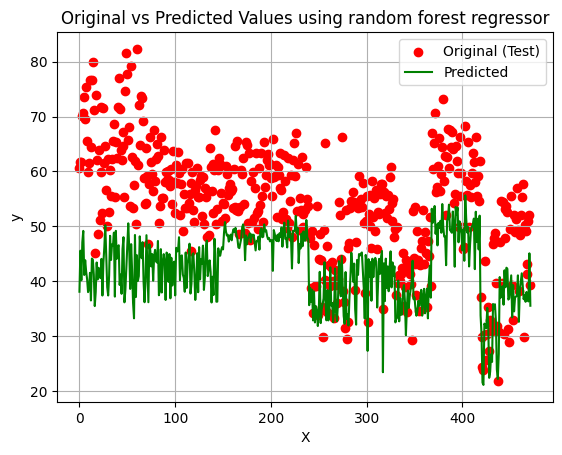

In [18]:
plt.scatter(range(0, Y_test.shape[0]), Y_test, color='red', label='Original (Test)')
plt.plot(range(0, Y_test.shape[0]), y_pred, color='green', label='Predicted')
plt.title('Original vs Predicted Values using random forest regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
